<a href="https://colab.research.google.com/github/sandip99999/Netflix-Movies-and-TV-Shows-Clustering/blob/main/netflix_movie_and_tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - **Unsupervised Clustering and Recommendation  System**
##### **Contribution**    - **Individual**
##### **Team Member  - SANDIP DEY**


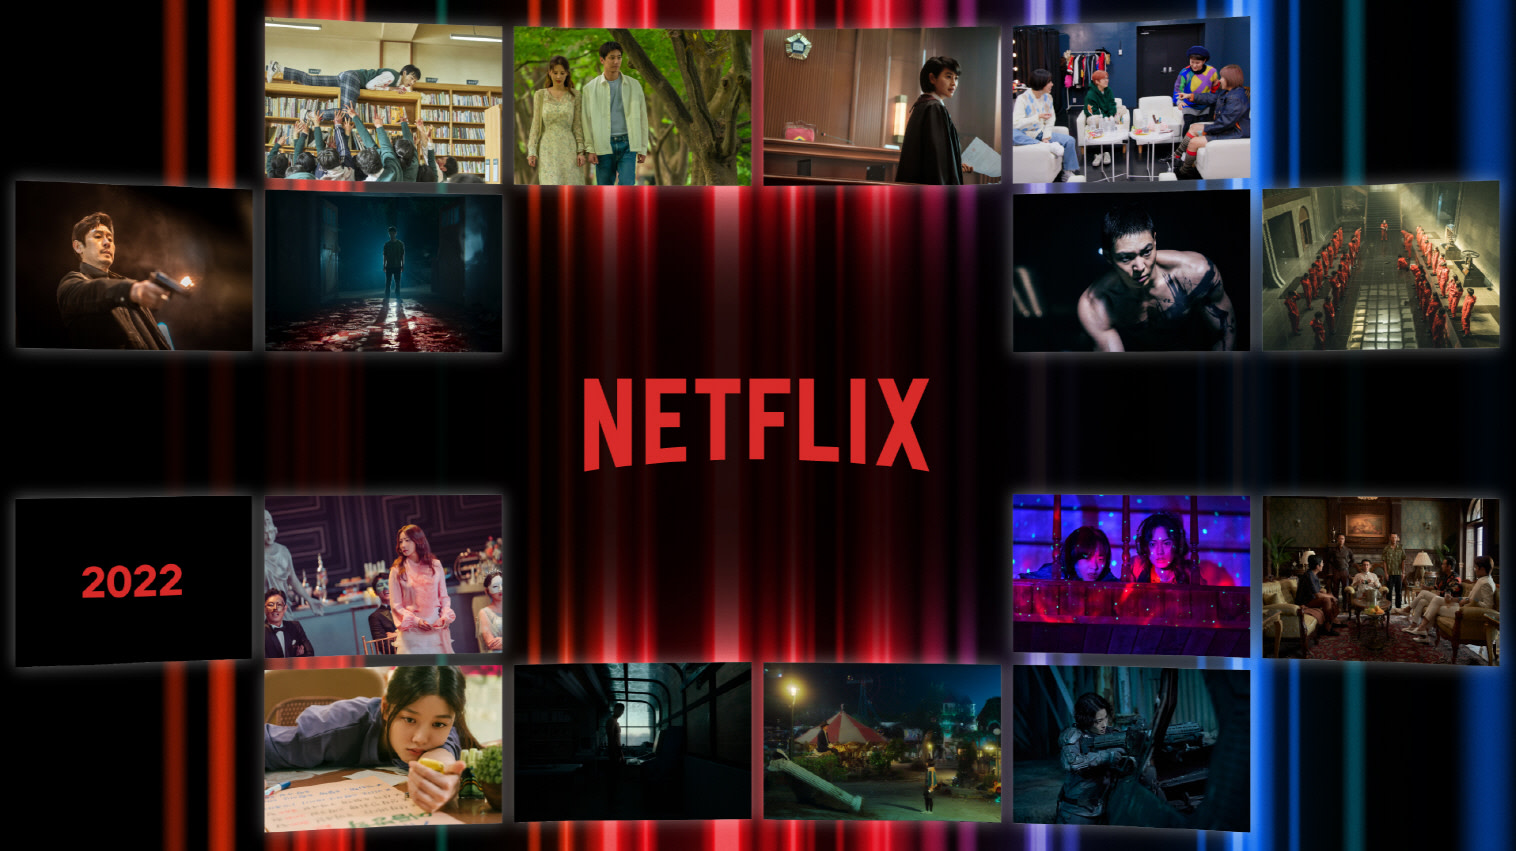

# **Project Summary -**

**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**


* The dataset contained about 7787 records, and 11 attributes.

* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

* Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

* We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

* We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

https://github.com/sandip99999/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do
Exploratory Data Analysis**

1. Understanding what type content is available in different countries

2. Is Netflix has increasingly focusing on TV rather than movies in recent years.

3. Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords  #stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [ ]:
# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')


from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk.tokenize import TweetTokenizer
!pip install nltk
import nltk
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

In [ ]:
#stop-words
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler
import nltk

# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/Netflix movie and TV shows clustering /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Netflix movie and TV shows clustering /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv", encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head(5)

In [ ]:
#dataset last view
netflix_df.tail(5)

In [ ]:
#shape of the dataset
netflix_df.shape

In [ ]:
#Getting all the columns
print("Features of the dataset:",netflix_df.columns)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'There are {netflix_df.shape[0]} Rows and {netflix_df.shape[1]} Columns in the dataset')

### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate entry in dataset is :",netflix_df.duplicated().sum())

**Not found any duplicated entries inside the dataset**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isnull().sum()

**There are many missing values in director, cast, country, date_added, and rating columns.**

In [ ]:
#total null values
netflix_df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.lineplot(netflix_df.isnull().sum())
plt.show()

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

There are 7787 Rows and 12 Columns in the dataset, and Not found any duplicated entries inside the dataset. There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values.

Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

In [ ]:
# Dataset Describe
netflix_df.describe(include='all').T

### Variables Description

**Attribute Information**

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_df.nunique()

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns:
  print(f'number of unique values in {i} column : {netflix_df[i].nunique()}  \n unique values are :\n {netflix_df[i].unique()}')
  print('-*-'*100)

**After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**

**We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as wel**

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#number of missing values in each column
netflix_df.isna().sum()

In [ ]:
len(netflix_df)

In [ ]:
# Checking the % of missing values in each attribute of the dataset
print(f"% of missing values in each columns: \n{round((netflix_df.isna().sum()/len(netflix_df))*100,2)}")

In [ ]:
# Handling the missing values
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

In [ ]:
import datetime as dt
def date(row):
  a = row['date_added']
  month = a.split()[0]
  year = a.split()[-1]
  day = a.split()[1].split(',')[0]
  a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
  return a

netflix_df['date_added'] = netflix_df.apply(lambda x: date(x), axis=1)

In [ ]:
netflix_df

In [ ]:
#final check of missing values in the dataset
netflix_df.isna().sum()

In [ ]:
netflix_df.shape

### What all manipulations have you done and insights you found?

The first line of the code replaces missing values in the director, cast and country column with the string Unknown.

The second line of the code replaces missing values in the ‘rating’ column with the most frequent value in that column. This is achieved by calling the mode() function on the country column, which returns the most frequent value, and then indexes the result with [0] to get the value itself.

The third line of the code, we have dropped the observations with the null values in the columns and applied inplace = True to make changes to the data frame.

At least we can see that all null values are handled, and our data is clean now and ready for further exploration.

Finally we have 7777 rows and 12 columns in our dataset


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Netflix Content

In [ ]:
netflix_df.head(2)

In [ ]:
# Chart - 1 visualization code
netflix_df['type'].value_counts()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = netflix_df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

In [ ]:
netflix_df

##### 1. Why did you pick the specific chart?

* For find out the distribution of Netflix type

##### 2. What is/are the insight(s) found from the chart?

1. Movies has more number of counts than TV Shows.

2. 31% of the data are from TV shows, while 69% of the data are from movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* In Netflix number of movies is 2.5 times higher than Tv shows.So we need to focuse for increase Tv shows in Netflix.

#### Chart - 2 Netflix Ratings

In [ ]:
netflix_df.head(2)

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=netflix_df['rating'])
plt.show()

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)

In [ ]:
netflix_df.head(2)

In [ ]:
#creating two extra dataset
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

In [ ]:
#Analysis on rating based on overall movie show rating system
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#Analysis rating based on overall tv show rating system
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#Ananlysis top 10 Ratings Show
plt.figure(figsize=(8,5))
plt.suptitle('TOP 10 Ratings FOR MOVIES AND TV SHOWS',fontsize=15, fontweight='bold')
graph = sns.countplot(x="rating", data=netflix_df, hue='type',palette="BrBG",order=netflix_df['rating'].value_counts().index[0:10] )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* For find out the distribution of Netflix rating

##### 2. What is/are the insight(s) found from the chart?

* The most common rating for movies and television show is TV-MA, which stands for "Mature Audience or adults," followed by TV-14, which stands for "Younger Audience.

* Since the number of movies is higher than the number of TV shows, as we saw earlier in the type column, movies receive the highest rating when compared to TV shows, which is pretty obvious.

#### Chart - 3 Most occurred word in Title

In [ ]:
# Chart - 3 visualization code
netflix_df.head(5)

In [ ]:
# number of unique values
netflix_df['title'].nunique()

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

In [ ]:
text

In [ ]:
# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

In [ ]:
# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

* For show which words are used frequently in the movie or Tv Shows title column

##### 2. What is/are the insight(s) found from the chart?

* Words like 'Love', 'Christmas', 'Man', 'World', 'Life','Boy', 'Time', and 'Story' are frequently used in the movie title column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Here we can see that the most of the movie title contain  'Love', 'Christmas', 'Man' word.Its attract more people to watch the movie

#### Chart - 4 Netflix Genres

In [ ]:
# Chart - 4 visualization code
netflix_df.head(2)

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()

In [ ]:
# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

In [ ]:
# number of genres present in dataset
len(genres)

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20,fontweight='bold')
plt.setp(top.get_xticklabels(), rotation=60)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20,fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* For show which geners are most in netflix

##### 2. What is/are the insight(s) found from the chart?

* International Movies, Dramas, and Comedies make up the majority of the genres.

* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

#### Chart - 5 Netflix Duration

In [ ]:
# Chart - 5 visualization code
netflix_df.head(2)

In [ ]:
tv_shows.head(2)

In [ ]:
#Analysis on distribution of tv show duration
plt.figure(figsize=(8,5))
plt.title("DISTRIBUTION OF TV SHOW DURATION",fontsize=15,fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,palette="BrBG",order = tv_shows['duration'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies.head(2)

In [ ]:
#Analysis on distribution of movie duration
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(8,5))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute,palette="BrBG")
plt.title("DISTRIBUTION OF MINUTES IN DURATION",fontsize=15,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* To find out which type of movie has highest average duration time and also how many seasons tv shows are maximum available in the netflix.

##### 2. What is/are the insight(s) found from the chart?

* The majority of movies have  a duration between 90 and 120 minutes.
* The Majority of tv shows consisting of single season.
* The lengthiest average runtimes are found in NC-17 rated movies. The average duration of movies with a TV-Y rating is the shortest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Here we found that majority of movies duration in between 80 to 120 mins so it's important that new movie which will release in the future that should 80 to 120 mins long. And in the netflix mximum tv shows are consisting only one season.thats why only single season tv show will give positive impact in business.

#### Chart - 6 Netflix country wise

In [ ]:
netflix_df.head(2)

In [ ]:
# Chart - 6 visualization code
#Analysing top15 countries with most content
plt.figure(figsize=(12,5))
sns.countplot(x=netflix_df['country'],palette="BrBG",order=netflix_df['country'].value_counts().index[0:15],hue=netflix_df['type'])
plt.xticks(rotation=45)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* We have picked this above specific chart for find out which country has produced more movies and tv shows and which country produces less movies and tv shows

##### 2. What is/are the insight(s) found from the chart?

* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* India and united State have produced very less tv show compare to moves so there have a big gap in tv show production. it gives a huge opportunity to tv show maker to fulfill the gap and make a big profit in the business

#### Chart - 7 Most occurred word in Description

In [ ]:
netflix_df.head(2)

In [ ]:
# Chart - 7 visualization code
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

* For show which words are used frequently in the movie or Tv Shows description column.

##### 2. What is/are the insight(s) found from the chart?

* The most frequently used words in the description column are "family","find","life","love","new world" and "friend."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Here we can see that the most of the movie and tv show description contain "family," "find","life","love","new world" and "friend" word. Its attract more people to watch the movie or tv show.

#### Chart - 8 Netflix cast

In [ ]:
netflix_df.head(2)

In [ ]:
netflix_df.info()

In [ ]:
netflix_df['cast']!='Unknown'

In [ ]:
cast_df=netflix_df[netflix_df['cast']!='Unknown']

In [ ]:
# Chart - 8 visualization code
# seperating actors from cast column
cast = cast_df['cast'].str.split(', ', expand=True).stack()


# top actors name who play highest role in movie/show.
cast.value_counts()

In [ ]:
print(f"Number of TV Shows actors: {len(cast_df[cast_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(cast_df[cast_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = cast_df[cast_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = cast_df[cast_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

* I have picked this specific chart for find which caste has highest move and tv show in netflix.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### Chart - 9 Netflix Director

In [ ]:
netflix_df.head(2)

In [ ]:
print(f'number of unique directors : {netflix_df.director.nunique()}')

In [ ]:
#creating a new dataset which does not contain unknown value in director column
director_df=netflix_df[netflix_df["director"]!="Unknown"]

In [ ]:
print(f"Number of Movies directed by directors are : { director_df[director_df['type']=='Movie']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : { director_df[director_df['type']=='TV Show']['director'].value_counts().sum()}")

In [ ]:
# Chart - 9 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = director_df[director_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = director_df[director_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

* I have picked this specific chart for find which direcor has highest move and tv show in netflix.

##### 2. What is/are the insight(s) found from the chart?

* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [ ]:
#making copy of df_clean_frame
df_hypothesis=netflix_df.copy()
#head of df_hypothesis
df_hypothesis.head()

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df_hypothesis['duration'] = df_hypothesis['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
df_hypothesis.head(2)

In [ ]:
df_hypothesis['target_ages'].unique()

In [ ]:
#Another category is rating (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#from duration feature extractin string part and after extracting Changing the object type to numeric

df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

To perform this method, we first formulate the Null and Alternate Hypotheses.

The P-value method is used in Hypothesis Testing to check the significance of the given Null Hypothesis. Then, deciding to reject or support it is based upon the specified significance level or threshold.

In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

In [ ]:
#making copy of df_clean_frame
df_hypothesis=netflix_df.copy()
#head of df_hypothesis
df_hypothesis.head()

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df_hypothesis['duration'] = df_hypothesis['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

In [ ]:
df_hypothesis.type.value_counts()

In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))


#### 2. Perform an appropriate statistical test.

In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***